Run face and object detection
```
docker run -e VISION-DETECTION=True -e VISION-FACE=True -e MODE=High -d \
      -v localstorage:/datastore -p 5000:5000 \
       --name deepstack deepquestai/deepstack:noavx
```

In [1]:
import requests
from PIL import Image, ImageDraw

In [2]:
def draw_box(draw, prediction, text='', color=(255, 0, 0)):
    """Draw bounding box on image."""
    (left, right, top, bottom) = (prediction['x_min'], prediction['x_max'], prediction['y_min'], prediction['y_max'])
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)], width=5, fill=color)
    if text:
        draw.text((left, abs(top-15)), text, fill=color)

In [3]:
def format_confidence(confidence):
    """Takes a confidence from the API like 
       0.55623 and returne 55.6 (%).
    """
    return round(float(confidence)*100, 1)

format_confidence(0.55623)

55.6

## Face detection
https://deepstackpython.readthedocs.io/en/latest/facedetection.html

In [4]:
IP_ADDR = 'localhost'
PORT = 5000

TARGET = 'person'

In [5]:
img_file_family = "family.jpg"
image_data = open(img_file_family,"rb").read()

In [6]:
%%time
response = requests.post(f"http://{IP_ADDR}:{PORT}/v1/vision/face",files={"image":image_data})

CPU times: user 8.16 ms, sys: 33.2 ms, total: 41.4 ms
Wall time: 2.52 s


In [7]:
predictions = response.json()['predictions']
predictions

[{'confidence': 0.9999876,
  'y_min': 161,
  'x_min': 734,
  'y_max': 241,
  'x_max': 810},
 {'confidence': 0.9999721,
  'y_min': 196,
  'x_min': 475,
  'y_max': 276,
  'x_max': 542},
 {'confidence': 0.9998487,
  'y_min': 145,
  'x_min': 626,
  'y_max': 260,
  'x_max': 712},
 {'confidence': 0.9983006,
  'y_min': 173,
  'x_min': 543,
  'y_max': 288,
  'x_max': 620}]

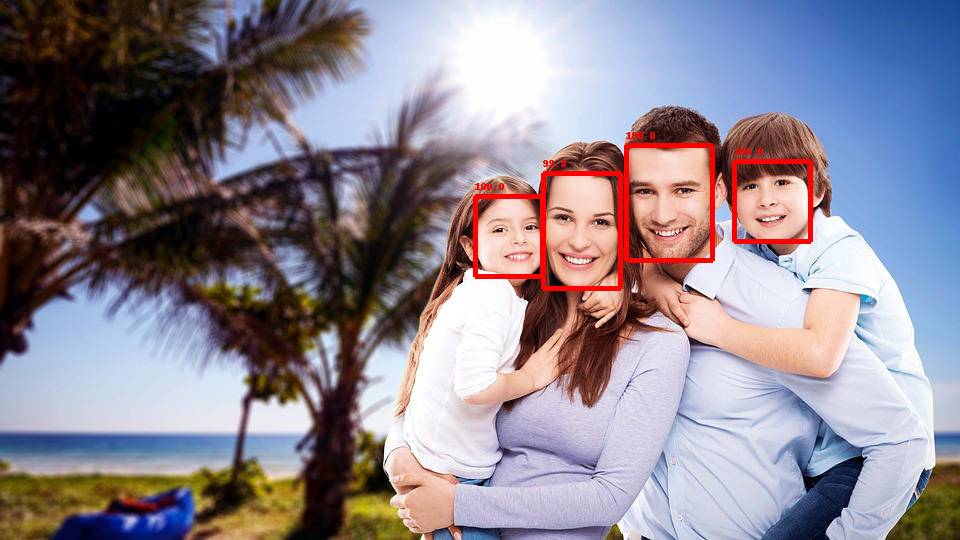

In [8]:
image = Image.open(img_file_family)
draw = ImageDraw.Draw(image)

for prediction in predictions:
    prediction_confidence = format_confidence(prediction['confidence'])
    draw_box(draw, prediction, str(prediction_confidence))

display(image)

## Object detection
https://deepstackpython.readthedocs.io/en/latest/objectdetection.html

In [9]:
%%time
img_file_test = "test-image3.jpg"
image_data = open(img_file_test,"rb").read()
response = requests.post(f"http://{IP_ADDR}:{PORT}/v1/vision/detection",files={"image":image_data})

predictions = response.json()['predictions']
predictions

CPU times: user 5.06 ms, sys: 2.62 ms, total: 7.69 ms
Wall time: 6.61 s


[{'confidence': 0.9998661,
  'label': 'person',
  'y_min': 0,
  'x_min': 258,
  'y_max': 676,
  'x_max': 485},
 {'confidence': 0.9996547,
  'label': 'person',
  'y_min': 0,
  'x_min': 405,
  'y_max': 652,
  'x_max': 639},
 {'confidence': 0.99745613,
  'label': 'dog',
  'y_min': 311,
  'x_min': 624,
  'y_max': 591,
  'x_max': 825}]

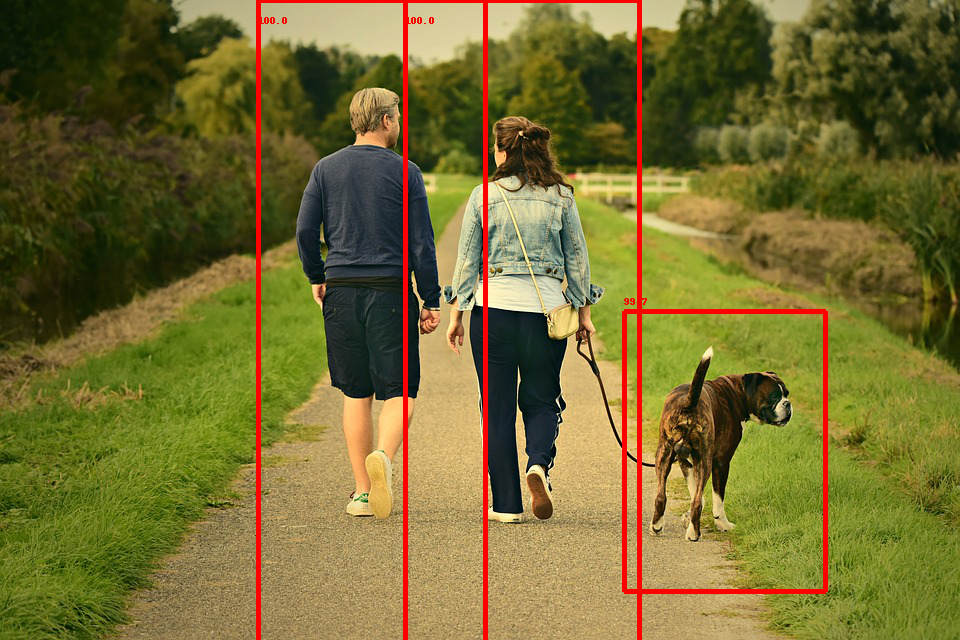

In [10]:
image = Image.open(img_file_test)
draw = ImageDraw.Draw(image)

for prediction in predictions:
    prediction_confidence = format_confidence(prediction['confidence'])
    draw_box(draw, prediction, str(prediction_confidence))

display(image)